In [1]:
%reload_ext eradiate.notebook.tutorials

*Last updated: 2024-01-11 10:40 (eradiate v0.25.1.dev1+gae91f29d.d20240108)*

First we load Eradiate and set the mono mode. After that we import mitsuba directly.

In [2]:
%load_ext eradiate
import eradiate
from eradiate import unit_registry as ureg
eradiate.set_mode("mono")

import mitsuba as mi

Next we import a few helper libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt

Next we create a simple mesh based object, here we use a rectangle.

In [4]:
vertices = np.array([[-1, -1, 0], [1, -1, 0], [-1, 1, 0], [1, 1, 0]])
faces = [[0, 1, 2], [1, 3, 2]]

In [5]:
mesh = eradiate.scenes.shapes.BufferMeshShape(
    vertices=vertices,
    faces=faces,
    bsdf=eradiate.scenes.bsdfs.LambertianBSDF(reflectance=0.5)
)

Next we set up a simple scene to visualise the mesh object.

In [6]:
def create_experiment(mesh):
    illu = eradiate.scenes.illumination.DirectionalIllumination(zenith=45)
    sensor = eradiate.scenes.measure.PerspectiveCameraMeasure(
        origin=(10, 10, 10), 
        target=(0, 0, 0), 
        up=(0, 0, 1), 
        fov=20, 
        film_resolution=(256, 256),
        spp=16
    )

    exp = eradiate.experiments.AtmosphereExperiment(
        atmosphere=None,
        surface=None,
        illumination=illu,
        measures=sensor,
        extra_objects = {
            "rectangle": mesh
        }
    )

    return exp

In [7]:
exp = create_experiment(mesh)

Now we run the simulation and visualise the result.

Mitsuba:   0%|          | 00:00, ETA=?

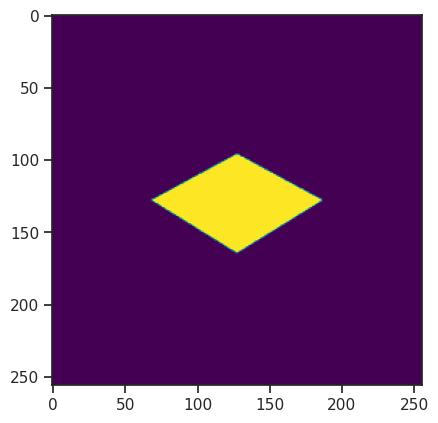

In [8]:
result = eradiate.run(exp)
plt.imshow(result.radiance.squeeze())

We see the rectangle. Next we create a scaling transform, that will elongate the rectangle along one direction.

In [9]:
trafo = mi.Transform4f.scale((1, 3, 1))

In [10]:
vertices_transformed = eradiate.warp.transform_affine(trafo, vertices)

We create a new buffermesh object, a new experiment, and run the simulation.

Mitsuba:   0%|          | 00:00, ETA=?

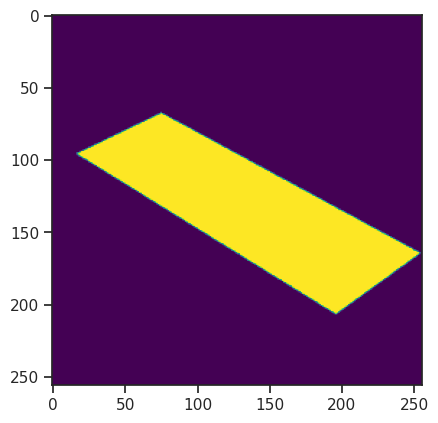

In [11]:
mesh_transformed = eradiate.scenes.shapes.BufferMeshShape(
    vertices=vertices_transformed,
    faces=faces,
    bsdf=eradiate.scenes.bsdfs.LambertianBSDF(reflectance=0.5)
)

exp_transformed = create_experiment(mesh_transformed)

result_transformed = eradiate.run(exp_transformed)

plt.imshow(result_transformed.radiance.squeeze())

The rectangle is now elongated along one axis. The procedure works the same for all types of affine transformations that are available in the mitsuba Transform4f class.